Below shows the process of data analaysis performed on an open source data relating to 1985 used automobile. The goal of the analysis is to predict the used car price given main characteristics of the car.

Here is an overview of the process:

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#data_acquisition">Data Acquisition</a> 
          <ul>
               <li><a href="#load_and_read_dataset">Load and read dataset</a> </li>
               <li><a href="#add_headers_for_dataset">Add headers for dataset</a></li>
          </ul>
    </li>  
    <li><a href="#data_preprocessing">Data Preprocessing</a>   
          <ul>
               <li><a href="#identify_and_handle_missing_values">Identify and handle missing values</a> </li>
               <li><a href="#explore_datatype_and_correct_mismatches">Explore datatype and correct mismatches</a></li>
               <li><a href="#standardize_dataset">Standardize dataset</a></li>
               <li><a href="#normalize_dataset">Normalize dataset</a> </li>
               <li><a href="#perform_data_binning">Perform data binning</a></li>
               <li><a href="#create_dummy_variables">Create dummy variables</a></li>  
          </ul>
    </li>
    <li><a href="#Exploratory_Data_Analysis">Exploratory Data Analysis</a></li>   
          <ul>
               <li><a href="#descriptive_statistics">Descriptive statistics</a> </li>
               <li><a href="#Perform_group_by">Perform group-by</a></li>
               <li><a href="#explore_correlation_between_variables">Explore correlation between variables</a></li>
               <li><a href="#perform_ANOVA">Perform ANOVA</a></li>  
          </ul>
  
</ol>


<h2>Data Acquisition</h2>



- Load and Read Dataset

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv')

In [0]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The first line in the dataset is just another entry of data rather than header. So we need to add the header for it.

-  Add Headers for Dataset

In [0]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [0]:
df.columns = headers

In [0]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<h2 id="import_data">Data Preprocessing</h2>


- Identify and Handle Missing Data

In the dataset, there are missing values with question marks. In order to evaluate the missing values, firstly we convert all question marks to NaN; Then, we use isnull method to identify all mising values and save the result to a new dataframe

In [0]:
import numpy as np
df.replace('?',np.nan, inplace=True)
missing_data = df.isnull()

for column in missing_data.columns:
  print(column)
  print(missing_data[column].value_counts())
  print('')

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

We identify there are missing values in columns "normalized-losses", "num-of-doors", 'bore', 'stroke', 'horsepower' and 'price'. Usually, there are two ways to handle missing values:

1. Drop the entire row or column
2. Replace the missing value with estimates

For numerical columns "normalized-losses", "bore", "stroke" and "horsepower", we are going to replace the missing values with the average of the valid entries for each variable.

In [0]:
missing_values1 = ["normalized-losses", "bore", "stroke", "peak-rpm","horsepower"]
for column in missing_values1:  
  average_column = df[column].astype('float').mean(skipna=True)
  df[column].replace(np.nan,average_column,inplace = True)


For the categorial column "num-of-doors", we will use the most often value to replace the missing values.

In [0]:
missing_values2 = df["num-of-doors"].value_counts().idxmax()
df["num-of-doors"].replace(np.nan,missing_values2,inplace = True)

For missing values in column "price", we will drop the rows that contain missing value. Because price is our target variable, the entry without price is useless for our goal of predicting price.

In [0]:
df.dropna(subset=['price'],axis=0,inplace = True)


We will reset the index after dropping some rows.

In [0]:
df.reset_index(drop=True, inplace=True)

- Explore Datatypes and Correct Mismatches

We will correct the mismatches of data types after we fix the missing values. Because question marks or nan values will cause some issues when we try to convert them to float-type.

In [0]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [0]:
data_types = ["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]
for column in data_types:
  df[column] = df[column].astype("float")

- Standardize Dataset

In our dataset, the units for "wheel-base", "length", "width" and "height" are inch. If the readers of the analaysis is from a country where meter is commonly used, we need to convert them to meters

In [0]:
df["wheel-base-M"] = df["wheel-base"]*0.0254
df["length-M"] = df["length"]*0.0254
df["width-M"] = df["width"]*0.0254
df["height-M"] = df["height"]*0.0254

- Normalize Dataset

Sometimes, in a dataset, there are variables with very different ranges. For example, the variable "length" has a larger range than the range of "bore". Due to the nature of data, "length" will have more influence on the result which is the predicted price than "bore". But it doesn't mean "length" is a better predictor for car prices than "bore". Therefore, we need to normalize our dataset to make variables have similar ranges to make meaningful comparison.

There are some ways we can normalize our data:

1. Simple feature scaling - divide each value in a feature by the max value for the feature;
2. Min-max method - subtract each value in a feature by the min value of the feature, then divide it by the range of the feature;
3. Z-score method - subtract each value in a feature by the average of the feature, then divide it by the standard deviation.

In [0]:
normalized_values = ["wheel-base", "length", "width", "height", "curb-weight"]
for column in normalized_values:
  df[column] = df[column]/df[column].max()

- Perform Data Binning

By performing data binning, we group numerical data into a smaller number of binns. we can get the distribution of the target variable in each bin, so that we have a better understanding of how the variable affects the result. We can first draw a histogram for the variable "engine-size" to get an intuition of the distribution of "engine-size".

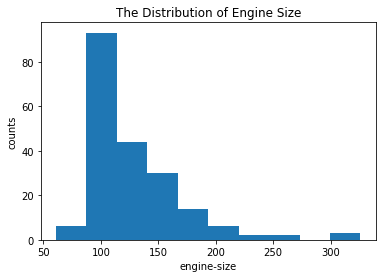

In [0]:
import matplotlib as plt
plt.pyplot.hist(df['engine-size'])
plt.pyplot.xlabel('engine-size')
plt.pyplot.ylabel('counts')
plt.pyplot.title('The Distribution of Engine Size')
plt.pyplot.show()

Then we split the enginze-size into three bins based on the value and make boxplot for each bin and see the distribution of the price within each bin.

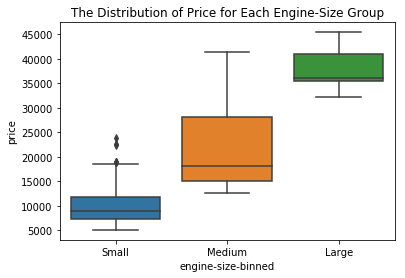

In [0]:
engine_size_bins = np.linspace(min(df['engine-size']),max(df['engine-size']),4)
group_name1 = ['Small', 'Medium','Large']
df['engine-size-binned']=pd.cut(df['engine-size'],engine_size_bins,labels = group_name1,include_lowest=True)

import seaborn as sns
sns.boxplot(x= 'engine-size-binned', y='price',data=df)
plt.pyplot.title('The Distribution of Price for Each Engine-Size Group')
plt.pyplot.show()


From the plot, we get an initial indication that the larger a car's engine size is, the higher the car's price is. In addition, we notice that there are outliers in the small engine-size group. For outliers which are abnormal far away from other values in the sample, there may be a couple of reasons, including measurement or recording error, or just a truthful outcome from the set's definition. Since the data points are for one group of the categorical variable and within the range of the variable, we will keep them as they are rather than drop or replace them. 

Next we repeat the process for the variable "horsepower":

1. Daw a histogram for feature "horsepower" 
2. Create a new column for binned "horsepower"
3. Make plots for each bin of "horsepower"

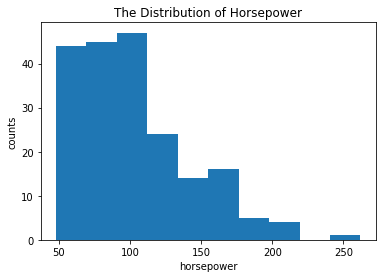

In [0]:
plt.pyplot.hist(df['horsepower'])
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('counts')
plt.pyplot.title('The Distribution of Horsepower')
plt.pyplot.show()

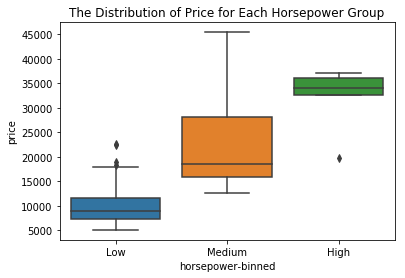

In [0]:
horsepower_bins =np.linspace(min(df['horsepower']),max(df['horsepower']),4)
group_name2 = ['Low','Medium','High']
df['horsepower-binned'] = pd.cut(df['horsepower'],horsepower_bins,labels=group_name2,include_lowest=True)

sns.boxplot(x='horsepower-binned', y='price', data=df)
plt.pyplot.title('The Distribution of Price for Each Horsepower Group')
plt.pyplot.show()



From the boxplot, we can see that cars with higher horsepower tends to have higher price than price of lower-horsepowered car. Also, we notice there are outliers in both of the low and high horsepower group. Since they are within the range of horsepower variable, we can keep them as they are for now.

- Create Dummy Variables

Sometimes, we need to convert categorical variables to numerical variables since some models only take numbers as input. A solution is to create a dummy variable for each category in the categorical variable. The number value for a dummy variable is just used to label category and has no inherent meaning.

We use method "value_counts" to get a short summary of all the categorial variables in our dataset and then make plots for some of the variables to get an intuition of the distribution of car price within each category for a certain categorical variable.

In [0]:
df.head()
dummy_variables = ['fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','num-of-cylinders','fuel-system']
for column in dummy_variables:
  print(column)
  print(df[column].value_counts())
  print('')  

fuel-type
gas       180
diesel     20
Name: fuel-type, dtype: int64

aspiration
std      164
turbo     36
Name: aspiration, dtype: int64

num-of-doors
four    115
two      85
Name: num-of-doors, dtype: int64

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: body-style, dtype: int64

drive-wheels
fwd    118
rwd     74
4wd      8
Name: drive-wheels, dtype: int64

engine-location
front    197
rear       3
Name: engine-location, dtype: int64

num-of-cylinders
four      156
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

fuel-system
mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64



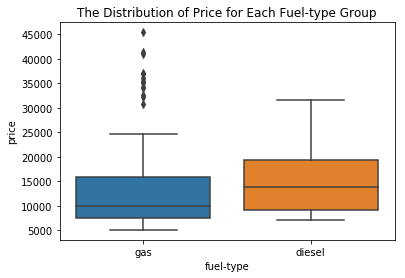

In [0]:
  sns.boxplot(x='fuel-type', y='price',data=df)
  plt.pyplot.title('The Distribution of Price for Each Fuel-type Group')
  plt.pyplot.show() 

From the plot, we notice that there is no significant difference in the price distribution for each group of the fuel-type.

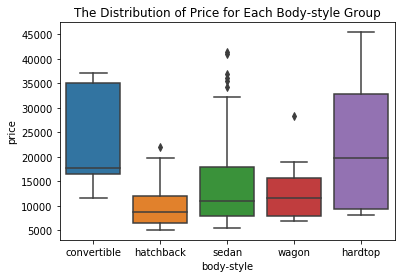

In [0]:
 sns.boxplot(x='body-style', y='price',data=df)
 plt.pyplot.title('The Distribution of Price for Each Body-style Group')
 plt.pyplot.show() 

From the plot, we notice that the price distribution for convertible and hardtop are similar and the distribution for hatcheback, sedan and wagon are similar. but the distribution for these two are very different.

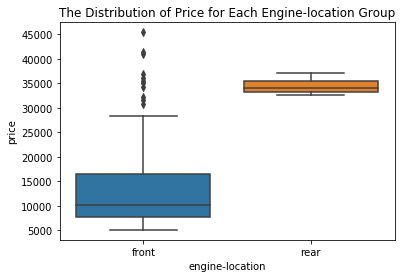

In [0]:
 sns.boxplot(x='engine-location', y='price',data=df)
 plt.pyplot.title('The Distribution of Price for Each Engine-location Group')
 plt.pyplot.show() 

From the plot above, we can see the price for different engine location is significantly different.

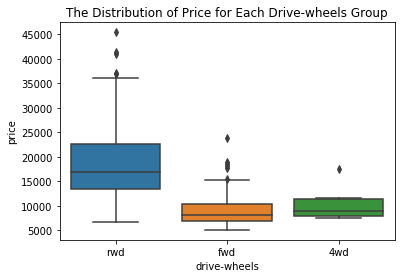

In [0]:
 sns.boxplot(x='drive-wheels', y='price',data=df)
 plt.pyplot.title('The Distribution of Price for Each Drive-wheels Group')
 plt.pyplot.show() 

From the plot, we notice that the distribution of price for forward drive-wheels and four drive-wheels are similar, but they are very different from rear drive-wheel.

Since the distribution of the price for each category of feature "engine location' is significantly different, which means the feature is potentially a good predictor for price. We'd like to convert the feature from object-typed data to numerical data by using dummy variables.

In [0]:
dummy_variable1 = pd.get_dummies(df['engine-location'])
df=pd.concat([df, dummy_variable1], axis =1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,wheel-base-M,length-M,width-M,height-M,engine-size-binned,horsepower-binned,front,rear
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,0.732837,0.811148,0.890278,0.816054,0.626660,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,2.25044,4.28752,1.62814,1.23952,Small,Low,1,0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,0.781638,0.822681,0.909722,0.876254,0.694294,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,2.40030,4.34848,1.66370,1.33096,Medium,Medium,1,0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,0.825476,0.848630,0.919444,0.908027,0.574766,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2.53492,4.48564,1.68148,1.37922,Small,Low,1,0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,0.822167,0.848630,0.922222,0.908027,0.694540,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2.52476,4.48564,1.68656,1.37922,Small,Low,1,0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,0.825476,0.851994,0.920833,0.887960,0.616576,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,2.53492,4.50342,1.68402,1.34874,Small,Low,1,0


<h2 id="import_data">Exploratory Data Analysis </h2>



- Descriptive Statistics

After cleaning up our dataset, we would like to make a short summary of descriptive statistics to get an overview of our dataset. 

In [0]:
df.describe()
#df.describe(include='all')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,wheel-base-M,length-M,width-M,height-M,front,rear
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,0.817601,0.837232,0.915250,0.899523,0.628555,126.860000,3.329981,3.259816,10.170100,103.367228,5118.259901,25.200000,30.705000,13205.690000,2.510739,4.425391,1.673809,1.366304,0.985000,0.015000
std,1.248557,32.076542,0.049944,0.059333,0.029207,0.040610,0.127544,41.650501,0.268562,0.314177,4.014163,37.455570,479.240743,6.432487,6.827227,7966.982558,0.153372,0.313617,0.053414,0.061683,0.121857,0.121857
min,-2.000000,65.000000,0.716294,0.678039,0.837500,0.799331,0.365962,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,2.199640,3.583940,1.531620,1.214120,0.000000,0.000000
25%,0.000000,100.250000,0.781638,0.800937,0.891319,0.869565,0.531972,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000,2.400300,4.233545,1.630045,1.320800,1.000000,0.000000
50%,1.000000,122.000000,0.802316,0.832292,0.909722,0.904682,0.593704,119.500000,3.310000,3.290000,9.000000,95.000000,5162.995050,24.000000,30.000000,10270.000000,2.463800,4.399280,1.663700,1.374140,1.000000,0.000000
75%,2.000000,138.250000,0.846981,0.881788,0.926042,0.928512,0.720180,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000,2.600960,4.660900,1.693545,1.410335,1.000000,0.000000
max,3.000000,256.000000,1.000000,1.000000,1.000000,1.000000,1.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,3.070860,5.285740,1.828800,1.518920,1.000000,1.000000


From the descriptive statistical summary, we can easily find that we have 200 entries in total and the mininum and maximum values, and quartiles for each numerical variables.

- Perform Group-by

Groupping based on multiple variables gives a better understanding of the relationship between variables and the price

1. Pick up all the interested variables and the target variable
2. Group the data by interested variables and perform some operation (e.g: sum or mean) on the grouped object

In [0]:
group_by_variables = df[['drive-wheels','body-style','price']]
group_by = group_by_variables.groupby(['drive-wheels','body-style'],as_index=False).mean()
group_by

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


The table shows the highest average price comes with rear-wheel driven and convertible car and the lowest average price with four-wheel driven and hatchback car. To make the table easier to read, we are going to visualize it by using Pivot method

In [0]:
pivot_table1 =group_by.pivot(index='drive-wheels', columns ='body-style')
pivot_table1

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd             11595.00   8249.000000  ...   9811.800000   9997.333333
rwd             26563.25  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

We will replace the "NaN" with zero to avoid issue in further analysis.

In [0]:
pivot_table1 = pivot_table1.replace(np.nan,0)
pivot_table1

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                 0.00      0.000000  ...  12647.333333   9095.750000
fwd             11595.00   8249.000000  ...   9811.800000   9997.333333
rwd             26563.25  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

We can even make the pivot table more readible by plotting a heat map.

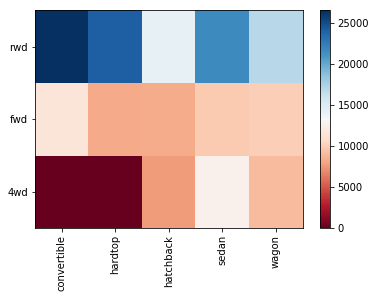

In [0]:
#plt.pyplot.pcolor(pivot_table1, cmap='RdBu')
#plt.pyplot.colorbar()
#plt.pyplot.show()

fig, ax=plt.pyplot.subplots()
lm=ax.pcolor(pivot_table1, cmap='RdBu')

ax.set_xticks(np.arange(pivot_table1.shape[1])+0.5, minor = False)
ax.set_yticks(np.arange(pivot_table1.shape[0])+0.5, minor = False)

row_labels=pivot_table1.index
col_labels=pivot_table1.columns.levels[1]

ax.set_xticklabels(col_labels)
ax.set_yticklabels(row_labels)

plt.pyplot.xticks(rotation=90)
fig.colorbar(lm)
plt.pyplot.show()



From the heat map above, we find that the top section tends to have high price and the bottom section has low price.

- Explore correlation between variables

In [0]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,wheel-base-M,length-M,width-M,height-M,front,rear
symboling,1.000000,4.697717e-01,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145790,0.008072,-0.181073,0.074625,0.284033,-0.030158,0.041248,-0.083327,-0.529145,-0.364511,-0.237262,-0.542261,-2.150143e-01,2.150143e-01
normalized-losses,0.469772,1.000000e+00,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029929,0.055673,-0.114738,0.217322,0.239580,-0.225255,-0.182011,0.133999,-0.057068,0.019433,0.086961,-0.377664,7.136535e-19,9.848419e-18
wheel-base,-0.529145,-5.706781e-02,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501576,0.144733,0.249689,0.375582,-0.365045,-0.480029,-0.552211,0.589147,1.000000,0.879005,0.814593,0.583789,1.915238e-01,-1.915238e-01
length,-0.364511,1.943295e-02,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610847,0.120929,0.159203,0.580606,-0.286688,-0.667658,-0.700186,0.691044,0.879005,1.000000,0.857271,0.492955,5.338437e-02,-5.338437e-02
width,-0.237262,8.696056e-02,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548485,0.182864,0.189008,0.617132,-0.247337,-0.638155,-0.684700,0.752795,0.814593,0.857271,1.000000,0.300995,5.282905e-02,-5.282905e-02
height,-0.542261,-3.776638e-01,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187917,-0.081103,0.259526,-0.085852,-0.315820,-0.057087,-0.111568,0.137284,0.583789,0.492955,0.300995,1.000000,1.116422e-01,-1.116422e-01
curb-weight,-0.234743,9.940431e-02,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644552,0.168669,0.156444,0.758071,-0.279422,-0.750390,-0.795515,0.834420,0.787584,0.881058,0.867720,0.310660,-5.128012e-02,5.128012e-02
engine-size,-0.112069,1.123616e-01,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572878,0.208133,0.029005,0.822695,-0.256681,-0.651002,-0.679877,0.872337,0.576779,0.685531,0.731100,0.076255,-1.994238e-01,1.994238e-01
bore,-0.145790,-2.992858e-02,0.501576,0.610847,0.548485,0.187917,0.644552,0.572878,1.000000,-0.051087,0.002034,0.566835,-0.267061,-0.581272,-0.590672,0.543433,0.501576,0.610847,0.548485,0.187917,-1.888753e-01,1.888753e-01
stroke,0.008072,5.567272e-02,0.144733,0.120929,0.182864,-0.081103,0.168669,0.208133,-0.051087,1.000000,0.186780,0.101003,-0.066021,-0.040547,-0.040170,0.083298,0.144733,0.120929,0.182864,-0.081103,1.416845e-01,-1.416845e-01


From the summary of the correlation between target variable '"price" and all other features, we can see that the variables with potential strong correlation with price are "length", "width", "curb-weight", "engine-size", "horsepower", "city-mpg" and "highway-mpg". Next, we are going to take a closer look at the variables by visualizing the relationship.

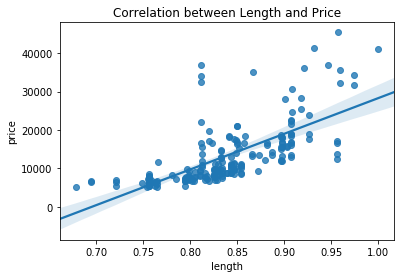

0.47754193402289613

In [0]:
sns.regplot(x='length', y='price',data=df).set_title('Correlation between Length and Price')
plt.pyplot.show()

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
x=df['length']
x=x.tolist()
x=np.reshape(x,(-1,1))
y=df['price']
lm.fit(x,y)
lm.score(x,y)

In [0]:
df['length-2order']=df['length']**2

z=df[['length','length-2order']]
z=np.reshape(z,(-1,2))

y=df['price']
lm.fit(z,y)
lm.score(z,y)


0.5272941695177951

From the analysis above, we can see the quadratic regression of length explains the price better than simple linear regression of length. But both of the R-squared values are relatively low.

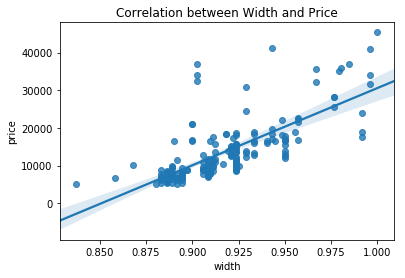

In [0]:
sns.regplot(x='width', y='price',data=df).set_title('Correlation between Width and Price')
plt.pyplot.show()

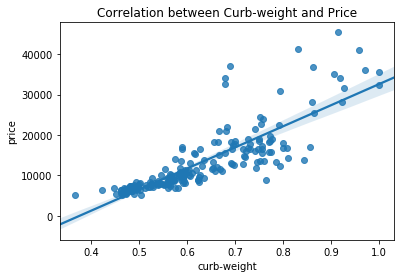

0.6962574620950065

In [0]:
sns.regplot(x='curb-weight', y='price',data=df).set_title('Correlation between Curb-weight and Price')
plt.pyplot.show()

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
x=df['curb-weight']
x=x.tolist()
x=np.reshape(x,(-1,1))
y=df['price']
lm.fit(x,y)
lm.score(x,y)

explore the relationship between the price and quadratic regression of "curb-weight"

In [0]:
df['curb-weight-2order']=df['curb-weight']**2

z=df[['curb-weight','curb-weight-2order']]
z=np.reshape(z,(-1,2))

y=df['price']
lm.fit(z,y)
lm.score(z,y)


0.7199152269580262

From the analysis above, we can see the quadratic regression of curb-weight explains the price better than simple linear regression of length. Also both of the R-squared values are relatively high.

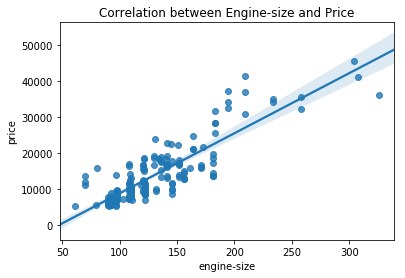

0.7609714051425504

In [0]:
sns.regplot(x='engine-size', y='price',data=df).set_title('Correlation between Engine-size and Price')
plt.pyplot.show()

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
x=df['engine-size']
x=x.tolist()
x=np.reshape(x,(-1,1))
y=df['price']
lm.fit(x,y)
lm.score(x,y)

We calcuated the R-squared value for the linear regression between engine-size and price. The value is relatively high which means the simple linear regression explains the price well and the engine-size is a good predictor for price.

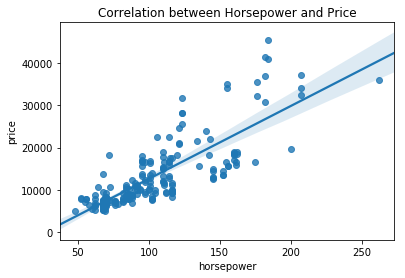

In [0]:
sns.regplot(x='horsepower', y='price',data=df).set_title('Correlation between Horsepower and Price')
plt.pyplot.show()

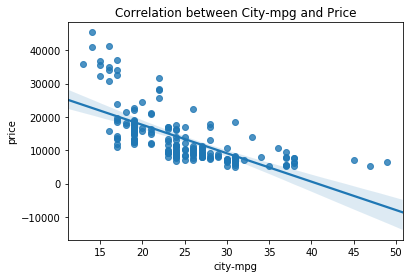

In [0]:
sns.regplot(x='city-mpg', y='price',data=df).set_title('Correlation between City-mpg and Price')
plt.pyplot.show()

In [0]:
import scipy.stats as stt
corr_coeff1, p_value1 = stt.pearsonr(df['curb-weight'],df['price'])
print('Correlation coefficient for curb-weight is:', corr_coeff1, 'with a p_value of', p_value1)
      
corr_coeff2, p_value2 = stt.pearsonr(df['engine-size'],df['price'])
print('Correlation coefficient for engine-size is:', corr_coeff2, 'with a p_value of', p_value2)

Correlation coefficient for curb-weight is: 0.8344204348498462 with a p_value of 3.969977536021808e-53
Correlation coefficient for engine-size is: 0.8723367498521142 with a p_value of 1.8977171466563487e-63


The analysis above shows the corelation coefficient for curb-weight is strong with a high confidence level, which means the predictor is statistically significant. Similarly, the engine-size as a predictor is also statistically significant.

- Perform ANOVA

We can perform analysis of variance by using ANOVA to explore the correlation between variables further.

In [0]:
group_by_variables2=group_by_variables[['drive-wheels','price']].groupby(['drive-wheels'])

import scipy.stats as stt
f_score, p_value = stt.f_oneway(group_by_variables2.get_group('fwd')['price'],group_by_variables2.get_group('rwd')['price'],group_by_variables2.get_group('4wd')['price'])
print('f_score for drive-wheels is:', f_score, 'with a p_value of', p_value)

f_score for drive-wheels is: 68.49603532807176 with a p_value of 2.6116313994533863e-23


The f_score indicates the ratio of the variance of each group's means and the variance within each group. The calculation result shows a significant difference between each category of drive-wheels with a high confidence level.

After cleaning up the automobile dataset and performing exploratory analysis, we concluldes that the features listed below are significant predictors for used car price:

- Numerical variables -
  - Length
  - Width
  - Engine-size
  - Curb-weight
  - Horsepower
  - City-mpg
  - Highway-mpg

- Categorical variables -
  - Engine-location
  - Drive-wheels
  - Body-style